# Youth Smoking and Drug: Analysis & ML Insights 🚭

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings("ignore")

In [85]:
df=pd.read_csv('youth_smoking_drug_data_10000_rows_expanded.csv')

In [86]:
df

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2023,10-14,Both,42.00,56.80,High,6,Yes,2,7,Yes,2,No,5,1
3,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
4,2023,15-19,Male,47.90,39.62,High,1,No,2,4,Yes,4,No,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2023,15-19,Male,49.17,10.21,Low,7,Yes,4,5,No,7,Yes,2,9
9996,2020,80+,Female,48.00,30.85,Middle,8,Yes,8,8,No,4,Yes,8,9
9997,2021,25-29,Both,47.62,39.54,High,1,No,7,2,Yes,1,No,5,10
9998,2022,40-49,Male,9.37,11.64,Low,7,No,10,1,No,2,Yes,10,4


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Age_Group             10000 non-null  object 
 2   Gender                10000 non-null  object 
 3   Smoking_Prevalence    10000 non-null  float64
 4   Drug_Experimentation  10000 non-null  float64
 5   Socioeconomic_Status  10000 non-null  object 
 6   Peer_Influence        10000 non-null  int64  
 7   School_Programs       10000 non-null  object 
 8   Family_Background     10000 non-null  int64  
 9   Mental_Health         10000 non-null  int64  
 10  Access_to_Counseling  10000 non-null  object 
 11  Parental_Supervision  10000 non-null  int64  
 12  Substance_Education   10000 non-null  object 
 13  Community_Support     10000 non-null  int64  
 14  Media_Influence       10000 non-null  int64  
dtypes: float64(2), int64

In [88]:
df.isnull().sum()

Year                    0
Age_Group               0
Gender                  0
Smoking_Prevalence      0
Drug_Experimentation    0
Socioeconomic_Status    0
Peer_Influence          0
School_Programs         0
Family_Background       0
Mental_Health           0
Access_to_Counseling    0
Parental_Supervision    0
Substance_Education     0
Community_Support       0
Media_Influence         0
dtype: int64

In [89]:
df.columns

Index(['Year', 'Age_Group', 'Gender', 'Smoking_Prevalence',
       'Drug_Experimentation', 'Socioeconomic_Status', 'Peer_Influence',
       'School_Programs', 'Family_Background', 'Mental_Health',
       'Access_to_Counseling', 'Parental_Supervision', 'Substance_Education',
       'Community_Support', 'Media_Influence'],
      dtype='object')

In [90]:
'''categorical_columns=['Year', 'Age_Group', 'Gender', 'Smoking_Prevalence',
                     'Access_to_Counseling','Substance_Education ']
for col in categorical_columns:
    print(f'{col}:\n(df[col].value_counts())\n')'''

"categorical_columns=['Year', 'Age_Group', 'Gender', 'Smoking_Prevalence',\n                     'Access_to_Counseling','Substance_Education ']\nfor col in categorical_columns:\n    print(f'{col}:\n(df[col].value_counts())\n')"

In [91]:
categorical_columns = ['Age_Group', 'Gender', 'Socioeconomic_Status', 'School_Programs', 'Access_to_Counseling', 'Substance_Education']
for col in categorical_columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

Age_Group:
Age_Group
20-24    1045
30-39    1021
60-69    1020
15-19    1014
10-14    1007
40-49    1001
50-59    1001
80+       979
25-29     974
70-79     938
Name: count, dtype: int64

Gender:
Gender
Both      3415
Male      3294
Female    3291
Name: count, dtype: int64

Socioeconomic_Status:
Socioeconomic_Status
High      3364
Middle    3344
Low       3292
Name: count, dtype: int64

School_Programs:
School_Programs
No     5041
Yes    4959
Name: count, dtype: int64

Access_to_Counseling:
Access_to_Counseling
No     5085
Yes    4915
Name: count, dtype: int64

Substance_Education:
Substance_Education
Yes    5011
No     4989
Name: count, dtype: int64



In [92]:
df.describe()

,Year,Smoking_Prevalence,Drug_Experimentation,Peer_Influence,Family_Background,Mental_Health,Parental_Supervision,Community_Support,Media_Influence
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2022.000500,27.439257,40.150182,5.440100,5.513300,5.469800,5.528000,5.544600,5.506200
std,1.425027,12.975528,17.515917,2.863151,2.865038,2.879326,2.891514,2.870302,2.872836
min,2020.000000,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2021.000000,16.160000,24.920000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2022.000000,27.355000,40.100000,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000
75%,2023.000000,38.672500,55.462500,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,2024.000000,50.000000,69.990000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## data visulization

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '15-19'),
  Text(1, 0, '10-14'),
  Text(2, 0, '40-49'),
  Text(3, 0, '70-79'),
  Text(4, 0, '30-39'),
  Text(5, 0, '60-69'),
  Text(6, 0, '50-59'),
  Text(7, 0, '25-29'),
  Text(8, 0, '80+'),
  Text(9, 0, '20-24')])

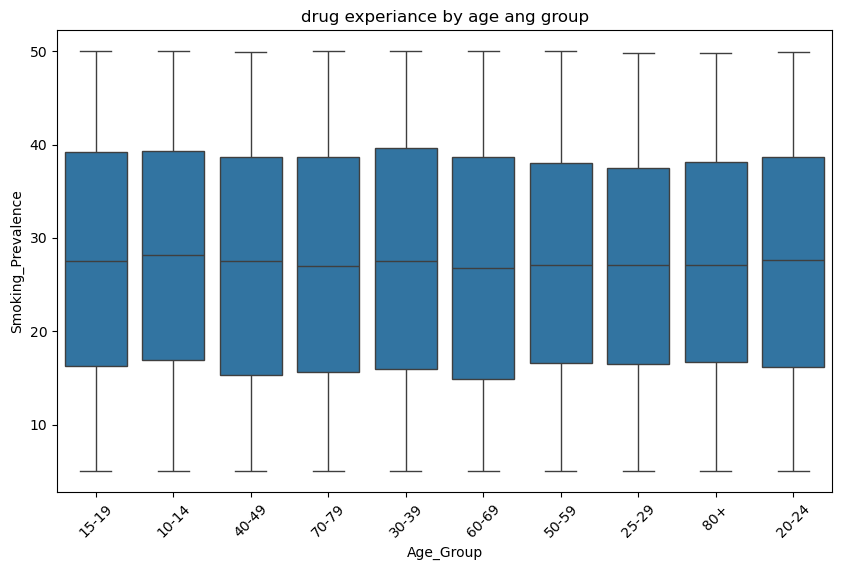

In [94]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Age_Group',y='Smoking_Prevalence',data=df)
plt.title('drug experiance by age ang group')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '15-19'),
  Text(1, 0, '10-14'),
  Text(2, 0, '40-49'),
  Text(3, 0, '70-79'),
  Text(4, 0, '30-39'),
  Text(5, 0, '60-69'),
  Text(6, 0, '50-59'),
  Text(7, 0, '25-29'),
  Text(8, 0, '80+'),
  Text(9, 0, '20-24')])

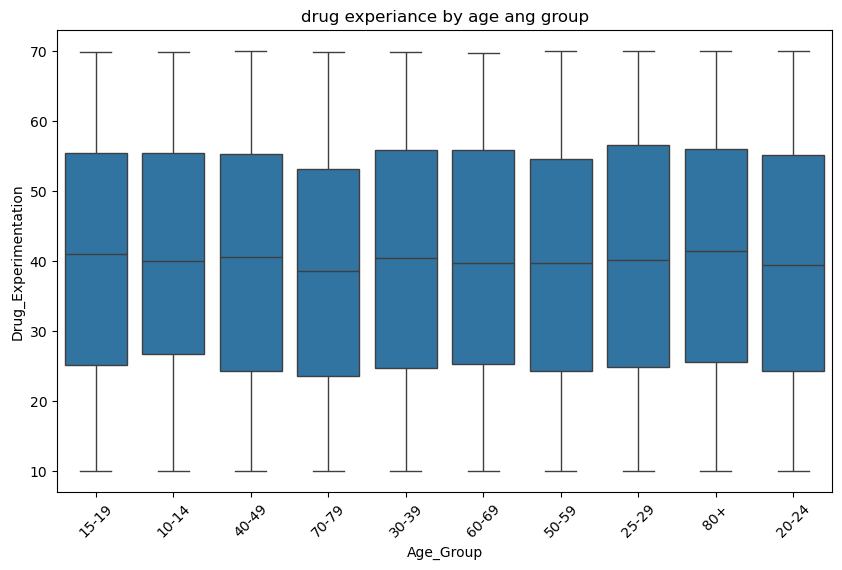

In [95]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Age_Group',y='Drug_Experimentation',data=df)
plt.title('drug experiance by age ang group')
plt.xticks(rotation=45)

In [96]:
df_numeric=df.select_dtypes(include=['number'])

In [97]:
correlation=df_numeric.corr()

Text(0.5, 1.0, 'correlation matrix')

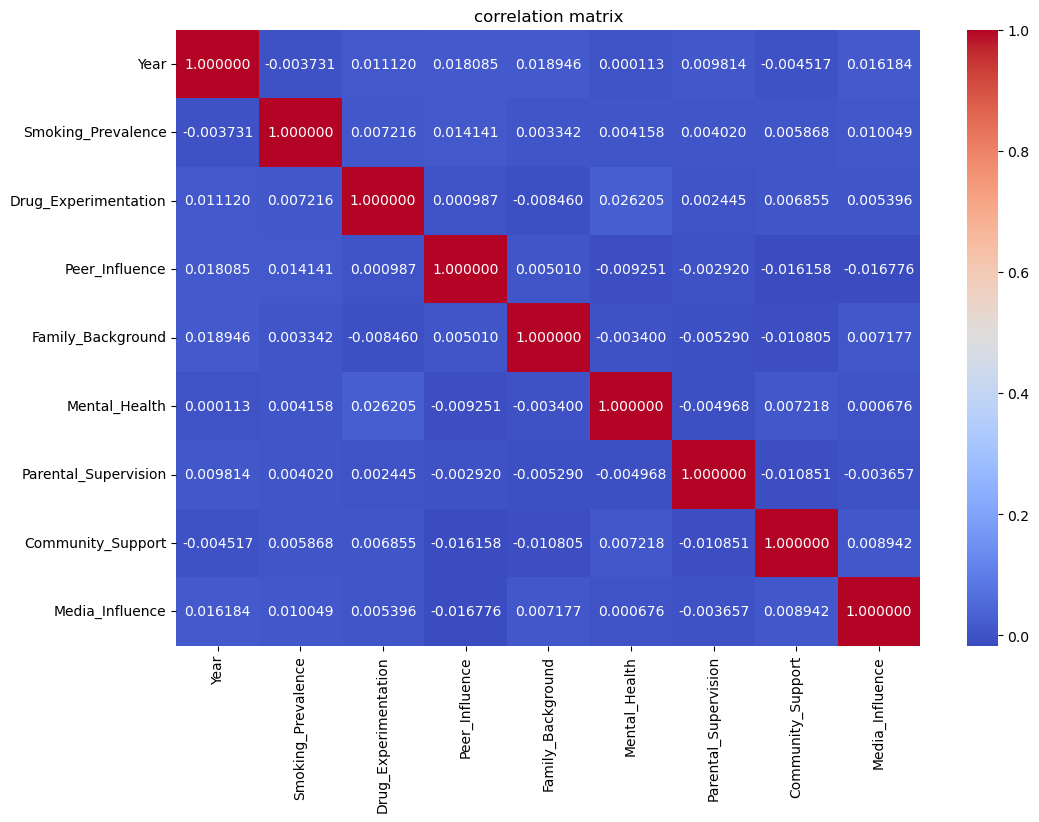

In [98]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,fmt='2f',cmap='coolwarm')
plt.title('correlation matrix')

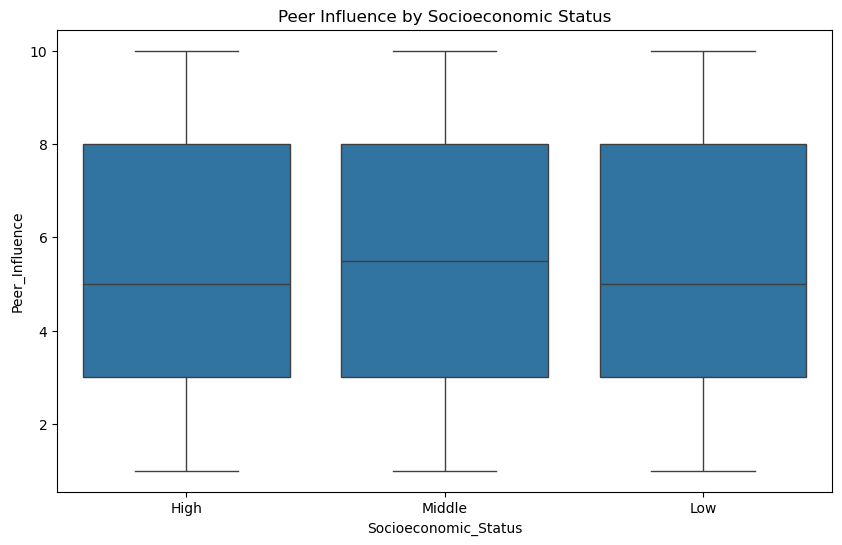

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Socioeconomic_Status', y='Peer_Influence', data=df)
plt.title('Peer Influence by Socioeconomic Status')
plt.show()

<Axes: xlabel='Age_Group', ylabel='Mental_Health'>

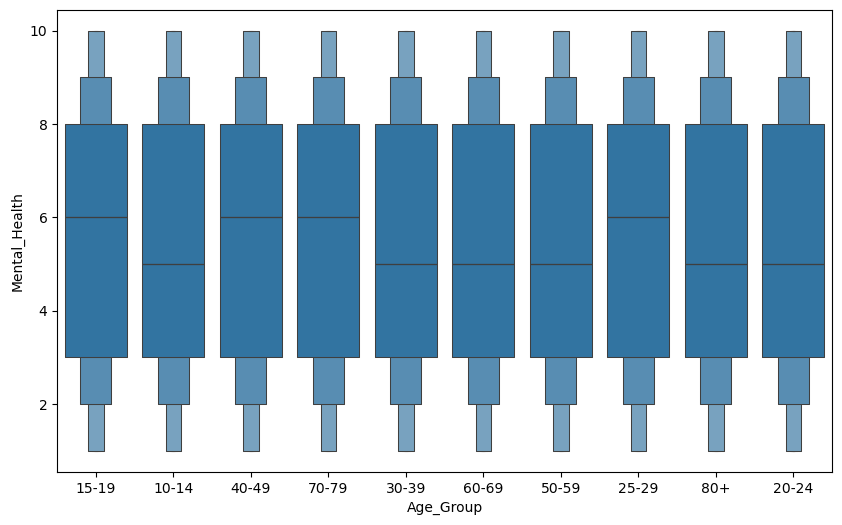

In [100]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='Age_Group',y='Mental_Health', data=df)

In [101]:
df.head(1)

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.4,High,5,Yes,1,5,No,4,No,3,1


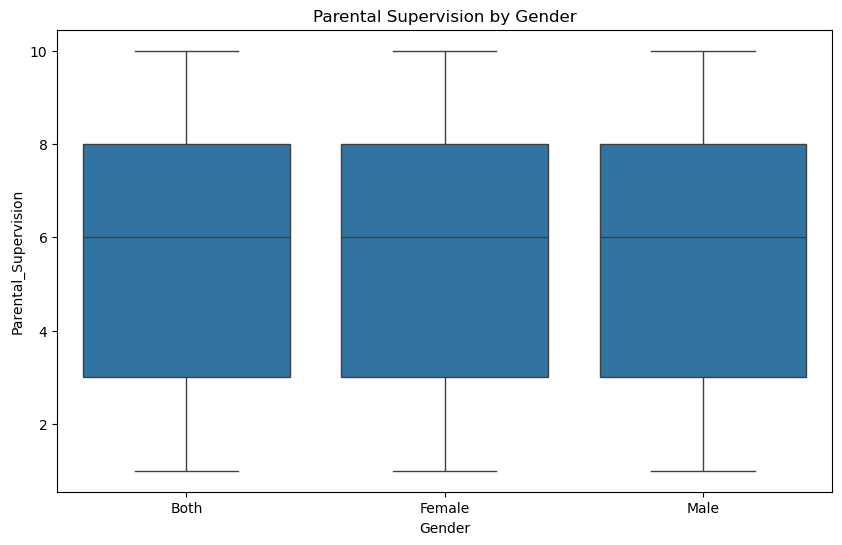

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Parental_Supervision', data=df)
plt.title('Parental Supervision by Gender')
plt.show()

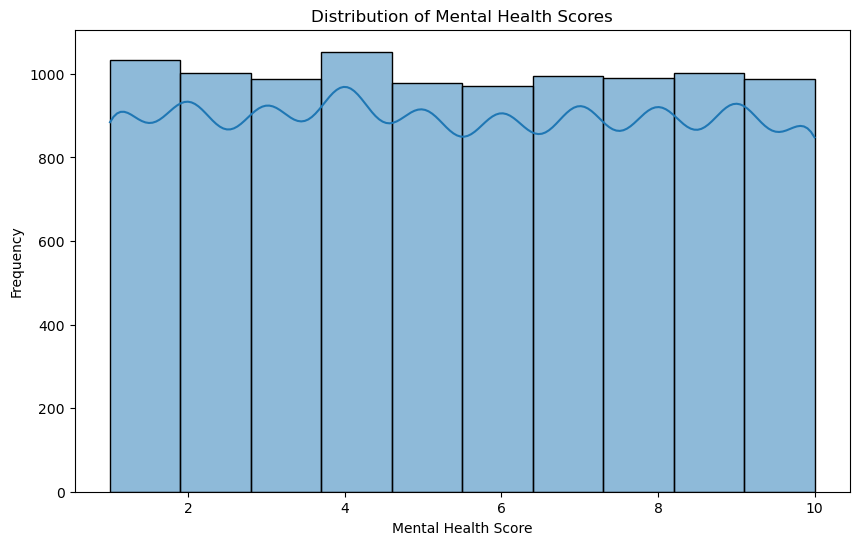

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mental_Health'], bins=10, kde=True)
plt.title('Distribution of Mental Health Scores')
plt.xlabel('Mental Health Score')
plt.ylabel('Frequency')
plt.show()


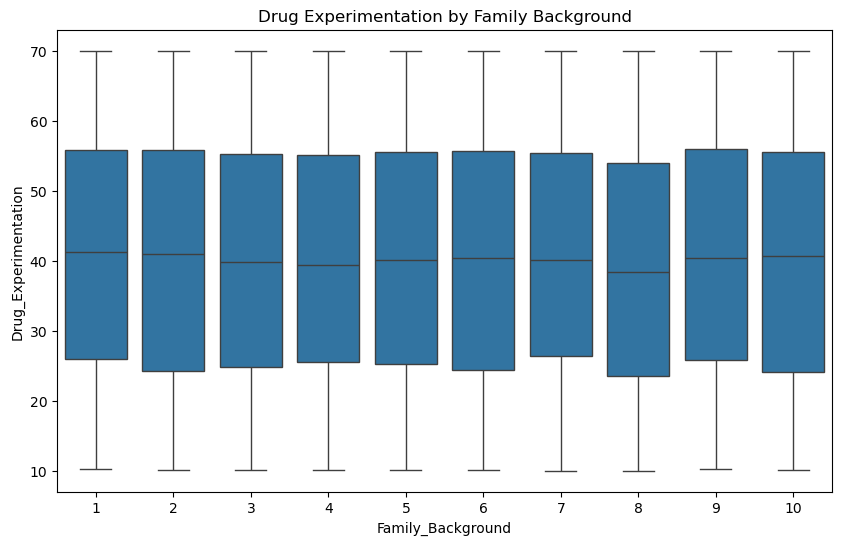

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Family_Background', y='Drug_Experimentation', data=df)
plt.title('Drug Experimentation by Family Background')
plt.show()

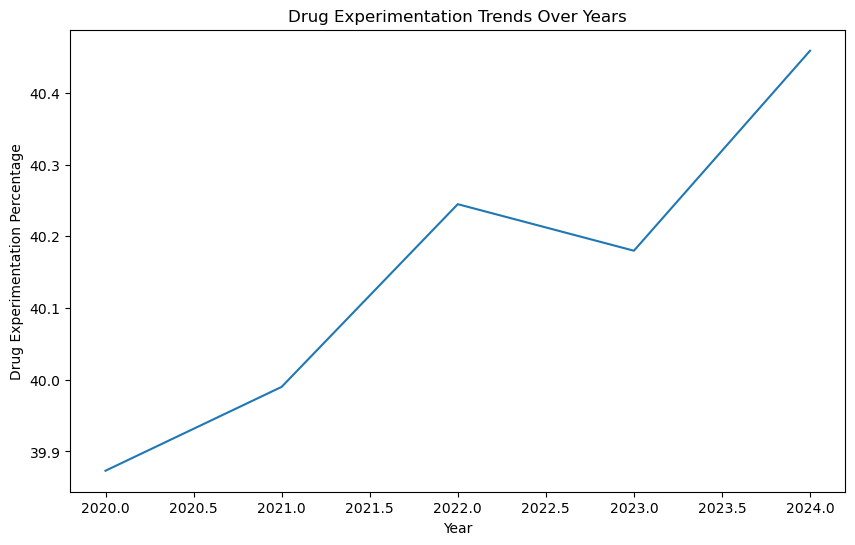

In [105]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Drug_Experimentation', ci=None)
plt.title('Drug Experimentation Trends Over Years')
plt.ylabel('Drug Experimentation Percentage')
plt.show()

In [106]:
avg_drug = df.groupby('Age_Group')['Drug_Experimentation'].mean().reset_index()
print(avg_drug)

  Age_Group  Drug_Experimentation
0     10-14             40.642701
1     15-19             40.304536
2     20-24             39.869359
3     25-29             40.659107
4     30-39             40.454172
5     40-49             40.138112
6     50-59             39.555804
7     60-69             40.097647
8     70-79             38.831013
9       80+             40.898836


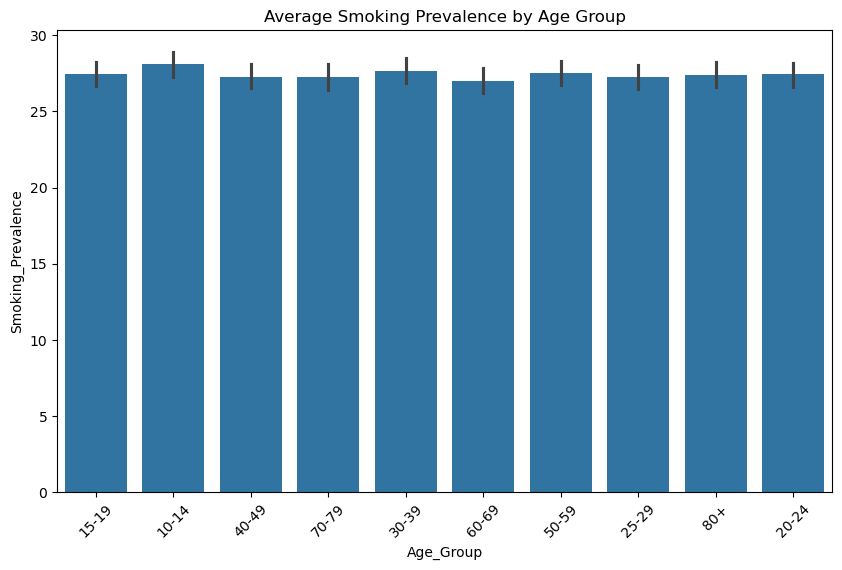

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Smoking_Prevalence', data=df)
plt.title('Average Smoking Prevalence by Age Group')
plt.xticks(rotation=45)
plt.show()

## MAchine learning


In [109]:
label_ncoderse={}
for column in categorical_columns:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
    label_ncoderse[column]=le

In [110]:
X = df.drop(['Smoking_Prevalence', 'Drug_Experimentation'], axis=1)  # Features
y = df['Smoking_Prevalence']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [112]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [113]:
from sklearn.metrics import mean_squared_error,r2_score

In [114]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 173.494969125375
R^2 Score: -0.040112842025527895


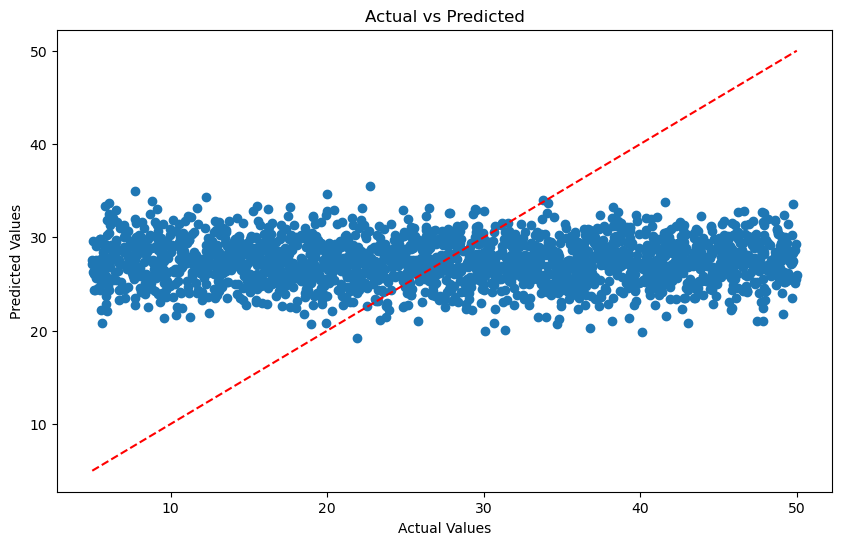

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

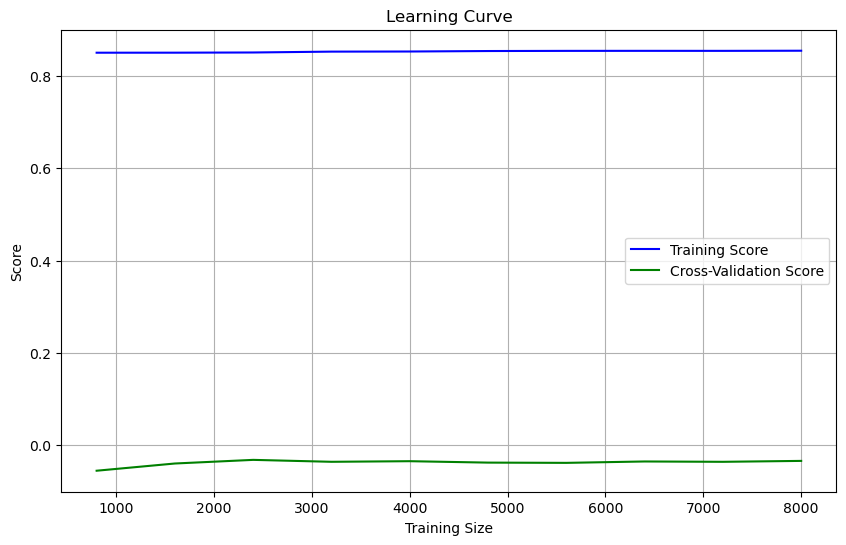

In [121]:

from sklearn.model_selection import learning_curve
import numpy as np

# Step 16: Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()